In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50,300), fontFace=font,
               fontScale=5, color=(255,255,255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [8]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

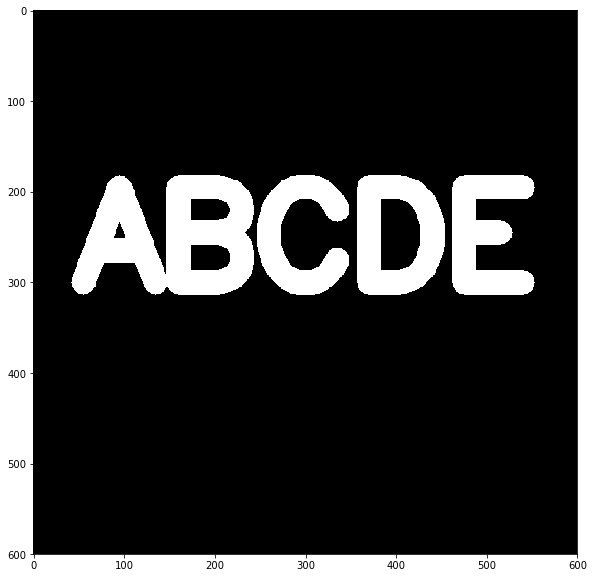

In [16]:
img = load_img()
display_img(img)

In [17]:
# EROSION
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

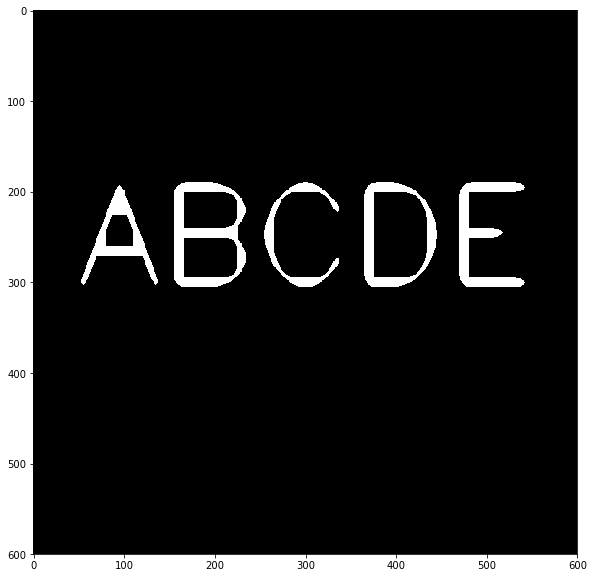

In [18]:
result = cv2.erode(img, kernel, iterations=4)
display_img(result)

In [19]:
# OPENING
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))
white_noise

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]])

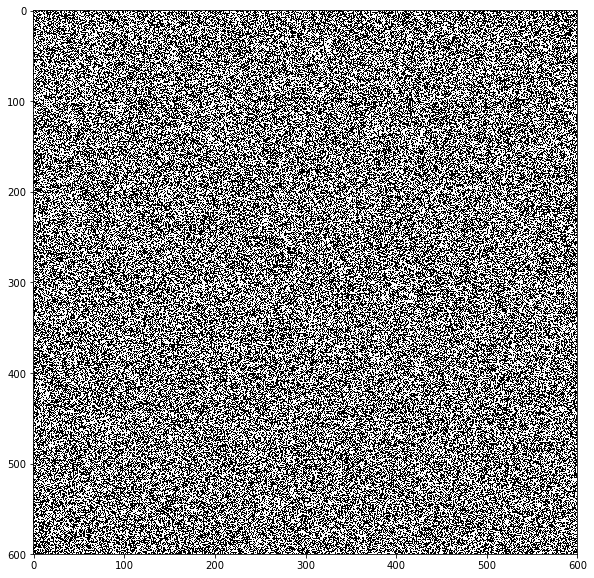

In [20]:
display_img(white_noise)

In [22]:
white_noise = white_noise * 255

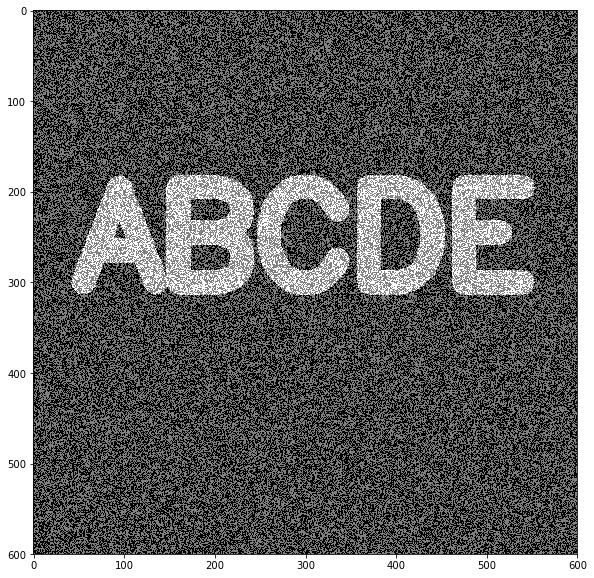

In [24]:
noise_img = white_noise + img
display_img(noise_img)

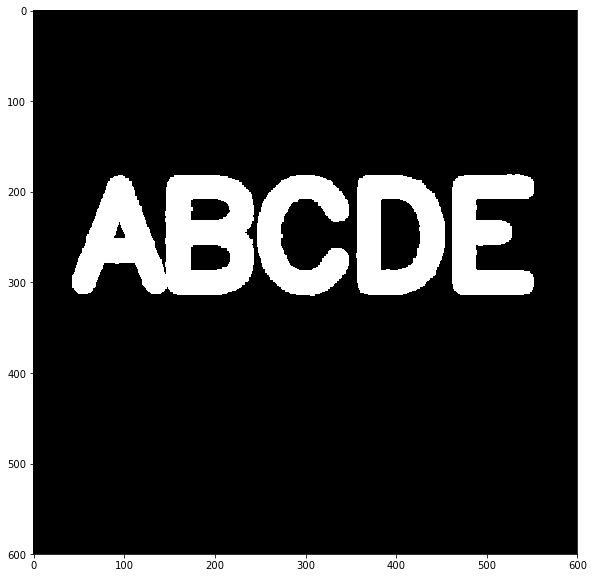

In [25]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

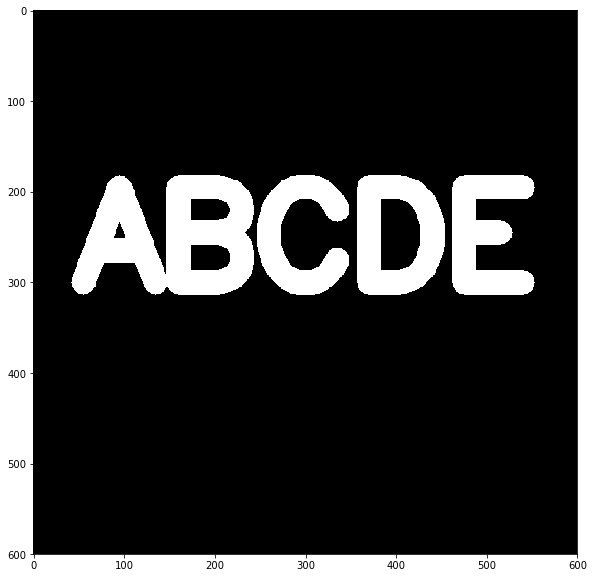

In [26]:
display_img(img)

In [36]:
# CLOSING
img = load_img()

In [37]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [38]:
black_noise = black_noise * -255
black_noise

array([[-255,    0, -255, ..., -255,    0, -255],
       [-255, -255,    0, ..., -255, -255,    0],
       [-255,    0, -255, ..., -255, -255,    0],
       ...,
       [   0, -255,    0, ...,    0, -255, -255],
       [   0,    0, -255, ..., -255, -255, -255],
       [   0,    0,    0, ...,    0, -255,    0]])

In [39]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0

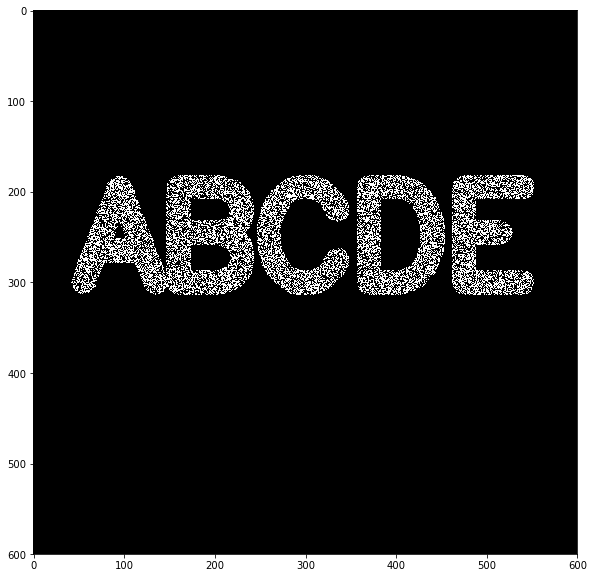

In [40]:
display_img(black_noise_img)

In [41]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

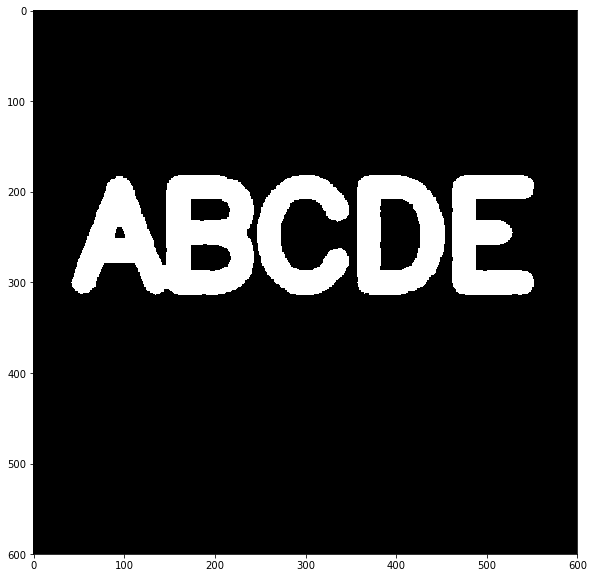

In [42]:
display_img(closing)

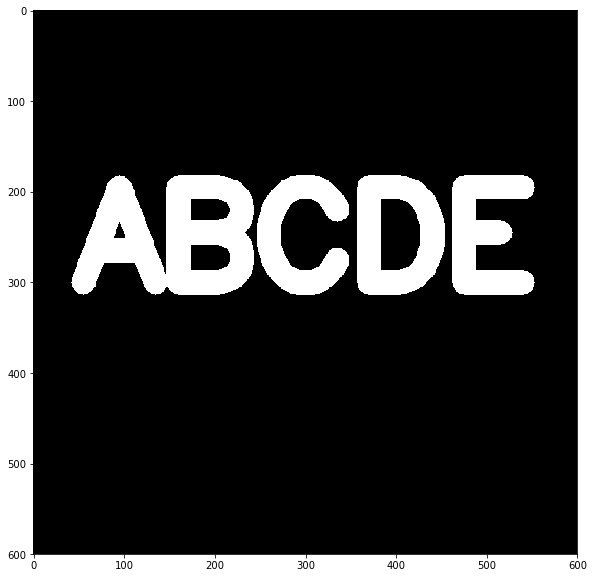

In [45]:
# GRADIENT
img = load_img()
display_img(img)

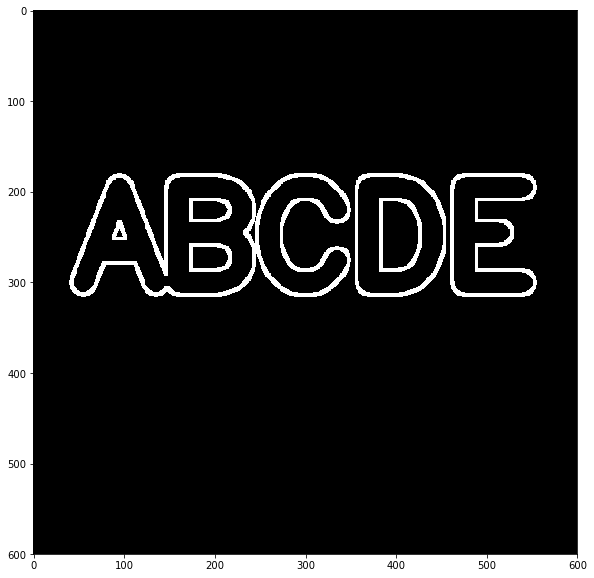

In [46]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)